In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
pd.set_option('display.max_columns',50)
pd.set_option('display.width',160)
sns.set(style = 'whitegrid')
%matplotlib inline

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [29]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [30]:
print(train.info())
print("\nMissing values (train):")
print(train.isnull().sum())
print("\nMissing values (test):")
print(test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values (train):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embar

In [31]:
print(train.describe(include = 'all').T)

             count unique                  top freq       mean         std   min     25%      50%    75%       max
PassengerId  891.0    NaN                  NaN  NaN      446.0  257.353842   1.0   223.5    446.0  668.5     891.0
Survived     891.0    NaN                  NaN  NaN   0.383838    0.486592   0.0     0.0      0.0    1.0       1.0
Pclass       891.0    NaN                  NaN  NaN   2.308642    0.836071   1.0     2.0      3.0    3.0       3.0
Name           891    891  Dooley, Mr. Patrick    1        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Sex            891      2                 male  577        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Age          714.0    NaN                  NaN  NaN  29.699118   14.526497  0.42  20.125     28.0   38.0      80.0
SibSp        891.0    NaN                  NaN  NaN   0.523008    1.102743   0.0     0.0      0.0    1.0       8.0
Parch        891.0    NaN                  NaN  NaN   0.381594    0.806057   0.0

In [32]:
print(train['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


Univariate analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

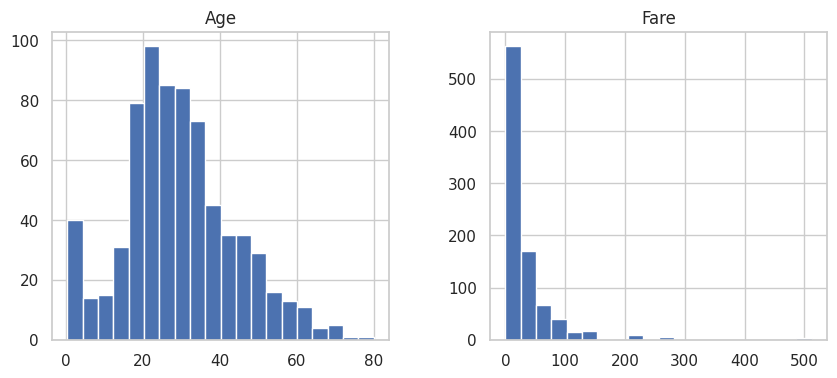

In [33]:
num_cols = ['Age','Fare']
train[num_cols].hist(bins = 20, figsize=(10,4))

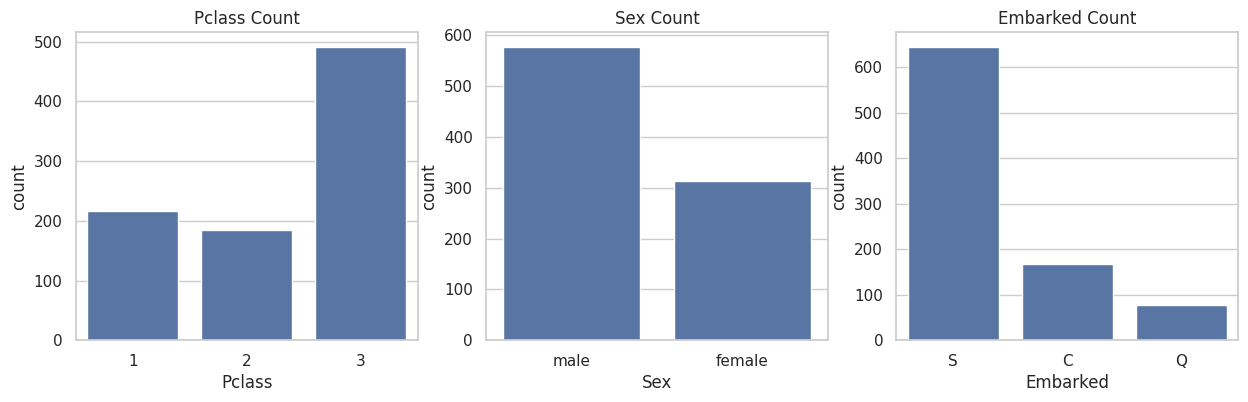

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
sns.countplot(x='Pclass',data=train,ax=axes[0])
sns.countplot(x='Sex', data= train, ax = axes[1])
sns.countplot(x = 'Embarked', data = train, ax = axes[2])
axes[0].set_title('Pclass Count')
axes[1].set_title('Sex Count')
axes[2].set_title('Embarked Count')
plt.show()

Bivariate analysis (Category vs Target)

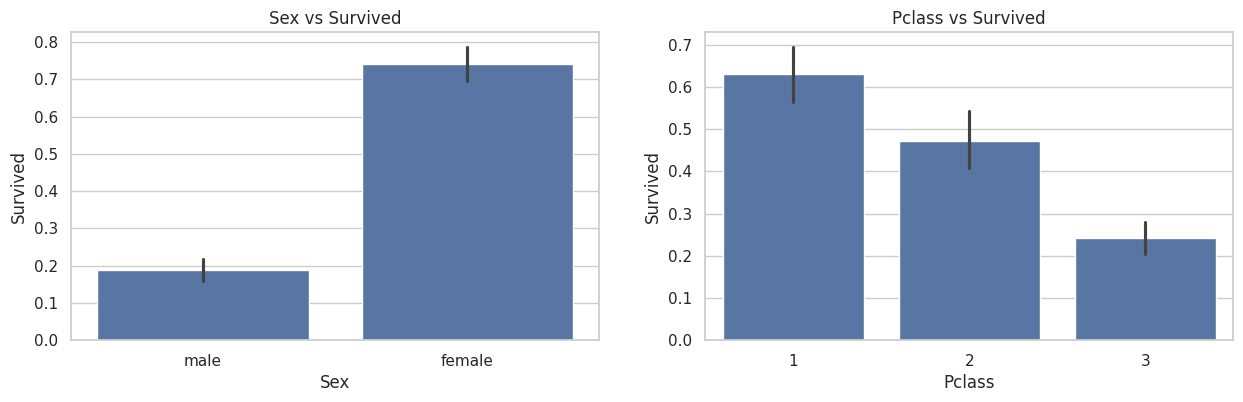

In [35]:
fig,axes = plt.subplots(1,2, figsize =(15,4))
sns.barplot(x = 'Sex', y = 'Survived', data = train, ax = axes[0])
sns.barplot(x = 'Pclass', y='Survived', data = train, ax = axes[1])
axes[0].set_title('Sex vs Survived')
axes[1].set_title('Pclass vs Survived')
plt.show()

In [36]:
train['Farebin'] = pd.qcut(train['Fare'].fillna(0)+1,4,labels = False)

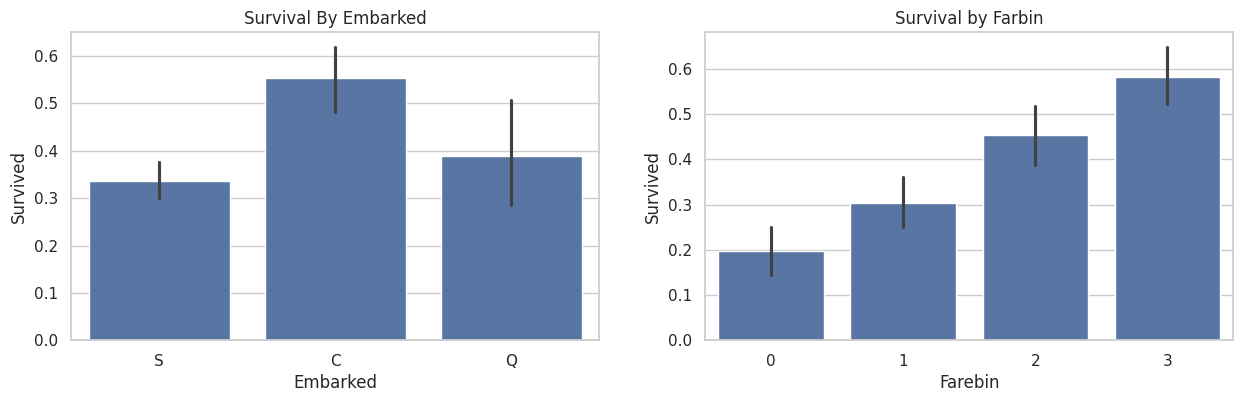

In [37]:
fig,axes = plt.subplots(1,2,figsize = (15,4))
sns.barplot(x= 'Embarked', y = 'Survived', data = train , ax = axes[0])
sns.barplot(x = 'Farebin', y = 'Survived', data = train, ax = axes[1])
axes[0].set_title('Survival By Embarked')
axes[1].set_title('Survival by Farbin')
plt.show()

/tmp/ipython-input-3409599764.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[train['Survived']==0, 'Age'].dropna(), label = 'Died', shade = True)
/tmp/ipython-input-3409599764.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train.loc[train['Survived']==1, 'Age'].dropna(), label = 'Survived', shade = True)


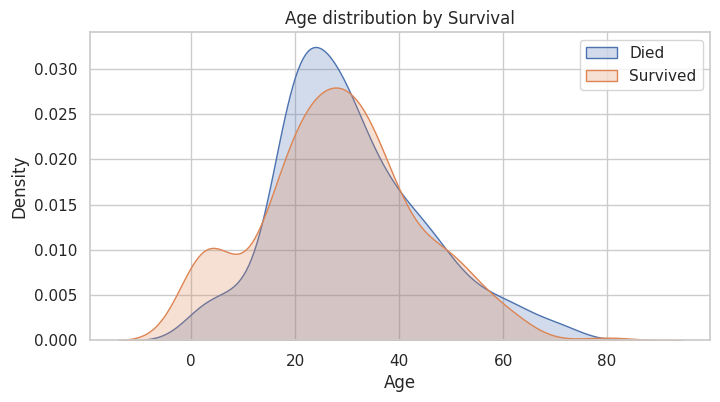

In [38]:
plt.figure(figsize = (8,4))
sns.kdeplot(train.loc[train['Survived']==0, 'Age'].dropna(), label = 'Died', shade = True)
sns.kdeplot(train.loc[train['Survived']==1, 'Age'].dropna(), label = 'Survived', shade = True)
plt.title('Age distribution by Survival')
plt.legend()
plt.show()

In [39]:
print("Rows with missing Age:", train[train['Age'].isnull()].shape[0])
train[train['Age'].isnull()].head()

Rows with missing Age: 177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farebin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0


In [40]:
# quick comparison to see patterns for missing Age
train.groupby(train['Age'].isnull())[['Sex','Pclass','Survived']].agg(lambda x: x.value_counts().index[0])


,Sex,Pclass,Survived
Age,,,
False,male,3,0
True,male,3,0


Feature Engineering

In [41]:

def feature_engineer(df):
    df = df.copy()
    # Title from Name
    df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    # Group rare titles
    rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
    df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
    df['Title'] = df['Title'].replace('Mme','Mrs')
    df['Title'] = df['Title'].apply(lambda t: 'Rare' if t in rare_titles else t)

    # Family size and is alone
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Cabin Deck (first letter)
    df['Deck'] = df['Cabin'].astype(str).str[0]
    df.loc[df['Deck']=='n','Deck'] = np.nan  # 'nan' strings from NaN conversion, convert back

    # Fare per person
    df['FarePerPerson'] = df['Fare'] / df['FamilySize']

    # Age bins (we'll fill age later)
    df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,18,35,60,120], labels=['Child','Teen','YoungAdult','Adult','Senior'])
    return df

train_fe = feature_engineer(train)
test_fe = feature_engineer(test)
train_fe[['Name','Title','FamilySize','IsAlone','Deck','FarePerPerson','Age','AgeBin']].head()


,Name,Title,FamilySize,IsAlone,Deck,FarePerPerson,Age,AgeBin
0,"Braund, Mr. Owen Harris",Mr,2,0,NaN,3.62500,22.0,YoungAdult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0,C,35.64165,38.0,Adult
2,"Heikkinen, Miss. Laina",Miss,1,1,NaN,7.92500,26.0,YoungAdult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0,C,26.55000,35.0,YoungAdult
4,"Allen, Mr. William Henry",Mr,1,1,NaN,8.05000,35.0,YoungAdult


In [42]:
train_feat = feat_eng(train)
test_feat = feat_eng(test)
train_feat[['Name','Title','FamilySize','isAlone','Deck','FarePerPerson','Age','AgeBin']].head()

,Name,Title,FamilySize,isAlone,Deck,FarePerPerson,Age,AgeBin
0,"Braund, Mr. Owen Harris",Mr,2,0,NaN,3.62500,22.0,YoungAdult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0,C,35.64165,38.0,Adult
2,"Heikkinen, Miss. Laina",Miss,1,1,NaN,7.92500,26.0,YoungAdult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0,C,26.55000,35.0,YoungAdult
4,"Allen, Mr. William Henry",Mr,1,1,NaN,8.05000,35.0,YoungAdult


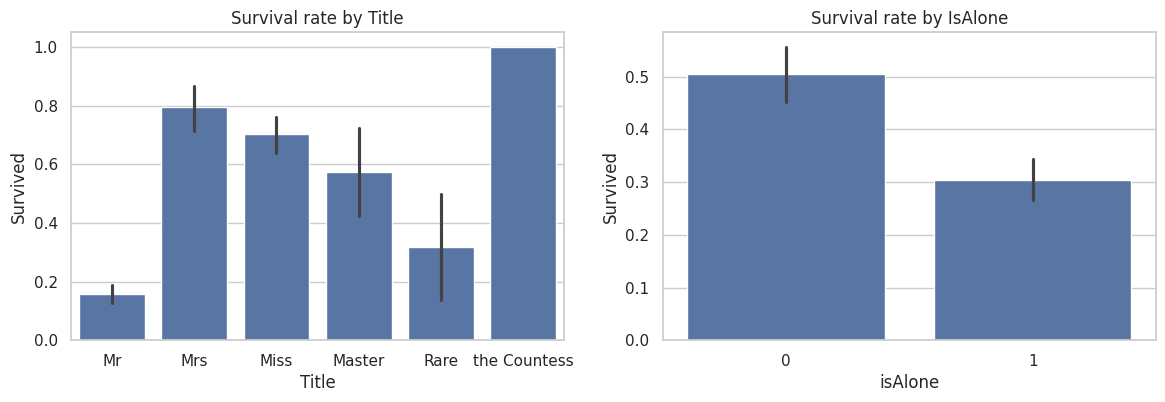

In [43]:

fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.barplot(x='Title', y='Survived', data=train_feat, ax=axes[0])
sns.barplot(x='isAlone', y='Survived', data=train_feat, ax=axes[1])
axes[0].set_title('Survival rate by Title')
axes[1].set_title('Survival rate by IsAlone')
plt.show()


In [45]:

def impute(df):
    df = df.copy()

    # Embarked
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Fare
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Age: median per Title, fallback to global median
    df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Recreate AgeBin after fixing Age
    df['AgeBin'] = pd.qcut(df['Age'], 4, labels=False)

    return df


train_fe = impute(train_fe)
test_fe = impute(test_fe)
print("Missing after impute (train):")
print(train_fe.isnull().sum())


Missing after impute (train):
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Farebin            0
Title              0
FamilySize         0
IsAlone            0
Deck             687
FarePerPerson      0
AgeBin             0
dtype: int64


Encoding categorical varibales

In [48]:
def encode(df):
    df = df.copy()
    # Sex binary
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    # Embarked one-hot
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb')
    # Title one-hot
    df = pd.get_dummies(df, columns=['Title'], prefix='Title')
    # Deck: replace NaN with 'U' unknown then one-hot
    df['Deck'] = df['Deck'].fillna('U')
    df = pd.get_dummies(df, columns=['Deck'], prefix='Deck')
    # AgeBin to categories (if desired)
    df['AgeBin'] = df['AgeBin'].astype(str)
    df = pd.get_dummies(df, columns=['AgeBin'], prefix='Age')
    return df

train_enc = encode(train_fe)
test_enc = encode(test_fe)

print("Columns after encoding (train):", train_enc.columns.tolist()[:40])


Columns after encoding (train): ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Farebin', 'FamilySize', 'IsAlone', 'FarePerPerson', 'Emb_C', 'Emb_Q', 'Emb_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_the Countess', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U', 'Age_0', 'Age_1', 'Age_2', 'Age_3']


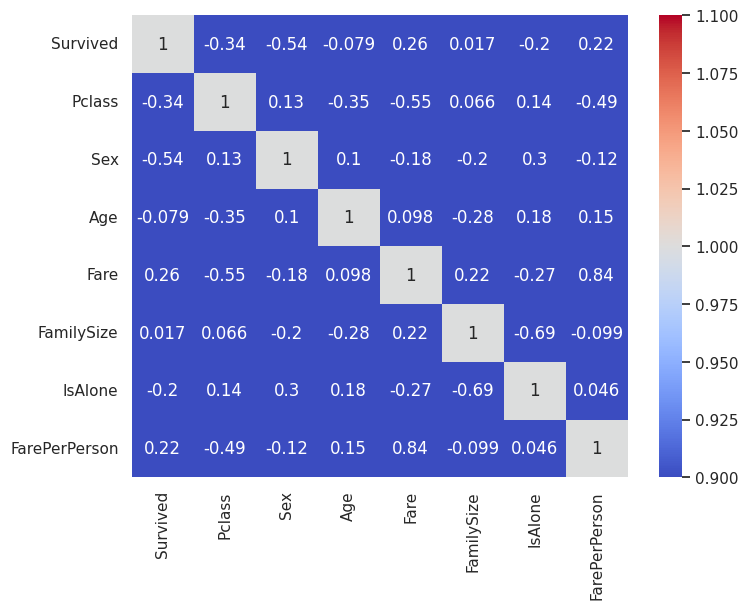

In [50]:
corr_cols = ['Survived','Pclass','Sex','Age','Fare','FamilySize','IsAlone','FarePerPerson']
corr = train_enc[corr_cols].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.show()

Important predictors for survival:
Sex, Pclass, Fare, FarePerPerson, IsAlone.

Multicollinearity risk:
Don’t use both Fare and FarePerPerson together (they’re almost the same).

Don’t use both FamilySize and IsAlone together (they’re highly correlated).

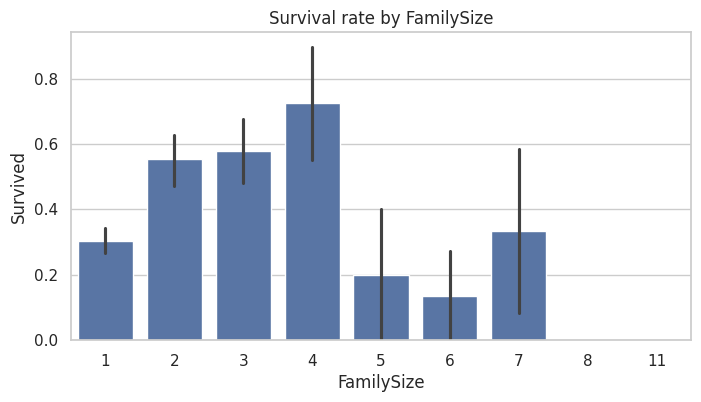

In [51]:
plt.figure(figsize=(8,4))
sns.barplot(x='FamilySize', y='Survived', data=train_enc)
plt.title('Survival rate by FamilySize')
plt.show()

In [52]:
drop_cols = ['Name','Ticket','Cabin']
train_model = train_enc.drop(columns=drop_cols)
test_model = test_enc.drop(columns=drop_cols)
train_model.to_csv('train_processed.csv', index=False)
test_model.to_csv('test_processed.csv', index=False)
print("Saved processed files.")

Saved processed files.


Quick baseline model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
x = train_model.drop(columns = ['Survived','PassengerId'])
y = train_model['Survived']

In [56]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

In [57]:
rf = RandomForestClassifier(n_estimators=100,random_state = 42)

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = rf.predict(x_val)

Accuracy:  0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



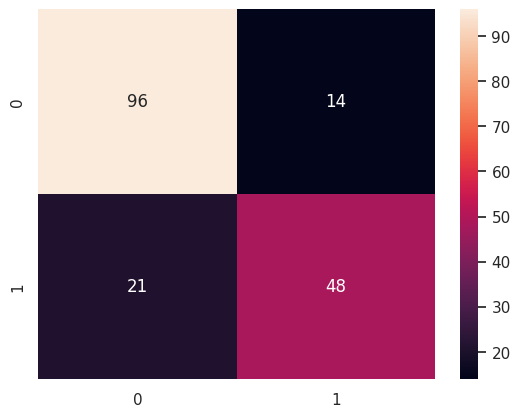

In [60]:
print("Accuracy: ", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot = True, fmt = 'd')
plt.show()

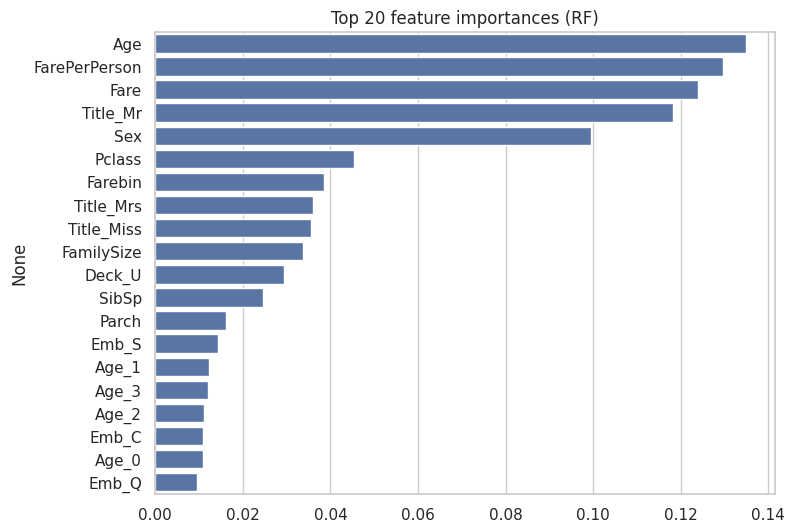

Age              0.134867
FarePerPerson    0.129739
Fare             0.124009
Title_Mr         0.118153
Sex              0.099461
Pclass           0.045445
Farebin          0.038636
Title_Mrs        0.035958
Title_Miss       0.035628
FamilySize       0.033784
Deck_U           0.029416
SibSp            0.024676
Parch            0.016081
Emb_S            0.014345
Age_1            0.012337
Age_3            0.012081
Age_2            0.011131
Emb_C            0.011014
Age_0            0.010984
Emb_Q            0.009492
Deck_E           0.008680
IsAlone          0.008303
Deck_D           0.007112
Title_Rare       0.006865
Title_Master     0.006087
Deck_C           0.004626
Deck_B           0.004380
Deck_A           0.002537
Deck_F           0.002296
Deck_G           0.001440
dtype: float64


In [62]:
importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values[:20], y=importances.index[:20])
plt.title('Top 20 feature importances (RF)')
plt.show()
print(importances[:30])

In [66]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [67]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [68]:
X = train_enc.drop(['Survived','Name','Ticket','Cabin','PassengerId'], axis=1, errors='ignore')
X_test = test_enc.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, errors='ignore')

In [69]:
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)
y = train_enc['Survived']


In [70]:
print('Final feature shape:', X.shape, X_test.shape)

Final feature shape: (891, 32) (418, 32)


IndentationError: expected an indented block after function definition on line 1 (ipython-input-3171086908.py, line 2)

In [73]:
def train_oof(models, X, y, X_test, n_splits=5, random_state=RANDOM_STATE):
  skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
  oof_preds = {name: np.zeros(len(X)) for name in models}
  test_preds = {name: np.zeros(len(X_test)) for name in models}
  scores = {}
  for name, model in models.items():
    print(f"\nTraining {name}")
    for fold, (tr_idx, val_idx) in enumerate(skf.split(X, y)):
      X_tr, y_tr = X.iloc[tr_idx], y.iloc[tr_idx]
      X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

# Fit model - some models accept pandas directly
      if name == 'CatBoost':
        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), verbose=0)
      else:
        model.fit(X_tr, y_tr)

# Use predict_proba when available; fallback to predict
      if hasattr(model, 'predict_proba'):
        oof_preds[name][val_idx] = model.predict_proba(X_val)[:,1]
        test_preds[name] += model.predict_proba(X_test)[:,1] / n_splits
      else:
        oof_preds[name][val_idx] = model.predict(X_val)
        test_preds[name] += model.predict(X_test) / n_splits

# Threshold at 0.5 for accuracy
    oof_binary = (oof_preds[name] >= 0.5).astype(int)
    acc = accuracy_score(y, oof_binary)
    try:
      auc = roc_auc_score(y, oof_preds[name])
    except Exception:
      auc = None
    scores[name] = {'accuracy': acc, 'roc_auc': auc}
    print(f"{name} CV accuracy: {acc:.4f}, roc_auc: {auc}")

  return oof_preds, test_preds, scores

In [74]:
models = {
'XGBoost': xgb.XGBClassifier(n_estimators=500, max_depth=4, learning_rate=0.02, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
'LightGBM': lgb.LGBMClassifier(n_estimators=1000, max_depth=5, learning_rate=0.02, subsample=0.8, colsample_bytree=0.8, random_state=RANDOM_STATE),
'CatBoost': cb.CatBoostClassifier(iterations=1000, depth=4, learning_rate=0.02, verbose=0, random_state=RANDOM_STATE)
}

In [75]:
oof_preds, test_preds, scores = train_oof(models, X, y, X_test, n_splits=5)


Training XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:21:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:21:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:21:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:21:13] WARNING: /w

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [77]:
print('\nCV summary:')
for k,v in scores.items():
  print(k, v)


CV summary:
XGBoost {'accuracy': 0.8417508417508418, 'roc_auc': None}
LightGBM {'accuracy': 0.8305274971941639, 'roc_auc': None}
CatBoost {'accuracy': 0.8451178451178452, 'roc_auc': None}


In [78]:
ensemble_test_prob = np.mean([test_preds[m] for m in test_preds], axis=0)
ensemble_oof_prob = np.mean([oof_preds[m] for m in oof_preds], axis=0)
ensemble_oof_pred = (ensemble_oof_prob >= 0.5).astype(int)
print('Ensemble OOF accuracy:', accuracy_score(y, ensemble_oof_pred))


Ensemble OOF accuracy: 0.8417508417508418


In [79]:
stack_X = np.vstack([oof_preds[m] for m in oof_preds]).T
stack_test = np.vstack([test_preds[m] for m in test_preds]).T

In [80]:
meta = LogisticRegression()
meta.fit(stack_X, y)
meta_oof_prob = meta.predict_proba(stack_X)[:,1]
meta_oof_pred = (meta_oof_prob >= 0.5).astype(int)
print('Stacking meta CV accuracy:', accuracy_score(y, meta_oof_pred))

Stacking meta CV accuracy: 0.8439955106621774


In [81]:
final_test_pred = meta.predict_proba(stack_test)[:,1]
final_test_label = (final_test_pred >= 0.5).astype(int)

In [82]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': final_test_label})
submission.to_csv('submission_stacked.csv', index=False)
print('Saved submission_stacked.csv')

Saved submission_stacked.csv
